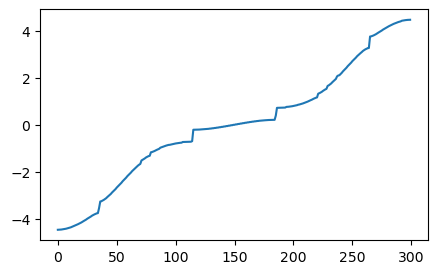

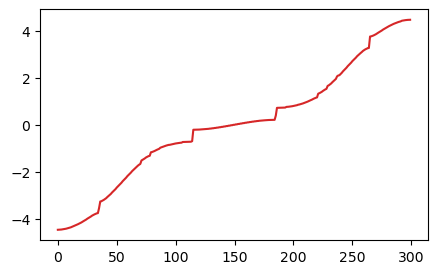

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def gen_H_mosaic1_real(L, t0, Mz, beta, phi=0):
    Ham = np.zeros((L, L), dtype=np.complex128)
    for i in range(L - 1):
        Ham[i + 1, i] = t0
        Ham[i, i + 1] = t0
    for i in range(L):
        if i % 2 == 0:
            Ham[i, i] = 0
        else:
            Ham[i, i] = 2 * Mz * np.cos(2 * np.pi * beta * i + phi)
    Ham[0, L - 1] = t0
    Ham[L - 1, 0] = t0
    return Ham

def gen_H_mosaic1_momentum(L, t0, Mz, beta, phi=0):
    Ham = np.zeros((L, L), dtype=np.complex128)
    V = np.zeros(L, dtype=np.complex128)
    for i in range(L):
        if i % 2 == 0:
            V[i] = 0
        else:
            V[i] = 2 * Mz * np.cos(2 * np.pi * beta * i + phi)
        Ham[i, i] = t0 * 2 * np.cos(i * 2 * np.pi / L)
    for i in range(L):
        for j in range(L):
            Ham[i, j] += np.sum(V / L * np.exp( - 1j * (i - j) * 2 * np.pi / L * np.arange(L, dtype=np.complex128)))  # * 是按元素乘法， @ 是矩阵乘法
    return Ham


if __name__ == '__main__':
    L = 300
    t0 = 1
    Mz = 2
    beta = (np.sqrt(5) - 1) / 2
    phi = 0

    H_real = gen_H_mosaic1_real(L, t0, Mz, beta, phi)
    H_k = gen_H_mosaic1_momentum(L, t0, Mz, beta, phi)

    E_real, V_real = np.linalg.eigh(H_real)
    E_k, V_k = np.linalg.eigh(H_k)

    plt.figure(figsize=(5, 3))
    plt.plot(np.arange(L), E_real, color='tab:blue')
    plt.figure(figsize=(5, 3))
    plt.plot(np.arange(L), E_k, color='tab:red')
    
    # plt.title(rf"{state_name}, L={L}")
    # plt.legend(loc='lower right')
    # plt.xlabel(rf"$steps/{dt}$")
    # plt.xlim(1, steps)
    # plt.ylabel(r"$S/L$")
    # plt.tight_layout()
    # plt.savefig("fig/" + file_name + ".png", dpi=300, bbox_inches="tight")
